In [173]:
# Read libraries

# Data wrangling
import pandas as pd
import numpy as np
import re

# Visualization 
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Machine learning 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [174]:
print("missingno version:", msno.__version__)
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)

missingno version: 0.4.2
matplotlib version: 3.7.1
pandas version: 1.5.3


In [156]:
df_2022 = pd.read_csv('/Users/albertcortbanke/Downloads/thesis_missing_data_2023/hfi/hfi_cc_2022.csv')

What can the Human Freedom Score measure, and more importantly, what is it unable to measure?
What attributes are the most important to explore missingness within? (I.e what attributes correlate highly, and would be pointless to measure within)

Spatial, and temporal missingness. How do we address this with spatial models and temporal accountance?


In [157]:
df_2022

,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2020,Albania,Eastern Europe,7.67,47.0,2.0,5.903741,4.725831,4.047825,7.194198,...,5.651538,6.000000,9.742477,5.9975,5.621940,7.175250,6.698118,7.112958,7.64,26.0
1,2020,Algeria,Middle East & North Africa,5.13,154.0,4.0,4.913311,5.503872,4.254187,5.461189,...,4.215154,2.222222,9.305002,2.5775,8.771111,7.029528,5.686753,5.778953,5.12,157.0
2,2020,Angola,Sub-Saharan Africa,5.97,122.0,3.0,2.773262,4.352009,3.478950,5.306695,...,2.937894,3.111111,8.730805,4.7025,7.916416,6.782923,5.696942,6.227545,5.91,138.0
3,2020,Argentina,Latin America & the Caribbean,6.99,74.0,2.0,6.824288,5.679943,4.218635,6.748978,...,2.714233,5.555556,9.579288,7.2675,5.726521,6.508295,6.225232,5.490538,4.87,161.0
4,2020,Armenia,Caucasus & Central Asia,8.14,26.0,1.0,NaN,NaN,NaN,7.204175,...,5.170406,5.111111,9.863530,6.2600,9.302574,7.040738,7.124727,7.756333,7.84,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,2000,"Venezuela, RB",Latin America & the Caribbean,6.43,86.0,3.0,NaN,NaN,NaN,5.902894,...,6.417950,6.150000,6.268547,4.3100,NaN,0.315142,4.692328,5.531397,5.92,87.0
3461,2000,Vietnam,South Asia,5.51,113.0,4.0,NaN,NaN,NaN,4.765274,...,NaN,NaN,7.885638,3.7000,NaN,0.000000,3.861879,4.416768,5.58,105.0
3462,2000,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,3.886318,...,NaN,NaN,NaN,1.1450,NaN,NaN,NaN,NaN,NaN,NaN
3463,2000,Zambia,Sub-Saharan Africa,7.03,72.0,3.0,NaN,NaN,NaN,6.087703,...,NaN,NaN,8.537578,7.0050,NaN,8.520369,8.020982,6.799421,7.04,43.0


In [158]:
#msno.matrix(df_2022)

In [159]:
df_copy = df_2022.isna().sum()

df_copy = pd.DataFrame(df_copy, columns=['na_count'])

In [160]:
df_copy.sort_values(by='na_count', ascending=False).head(60)

,na_count
pf_identity_inheritance_daughters,2548
pf_identity_inheritance_widows,2548
pf_rol_criminal,2075
pf_rol_procedural,2075
pf_rol_civil,2075
pf_ss_disappearances_organized,1494
ef_trade_movement_visit,1000
pf_expression_bti,970
pf_assembly_freedom_bti,970
ef_regulation_business_licensing,934


In [161]:
# Create a subset with all attributes except for the outcome-variables
df_attributes = df_2022.drop(columns=['ef_score','hf_score','pf_score'])

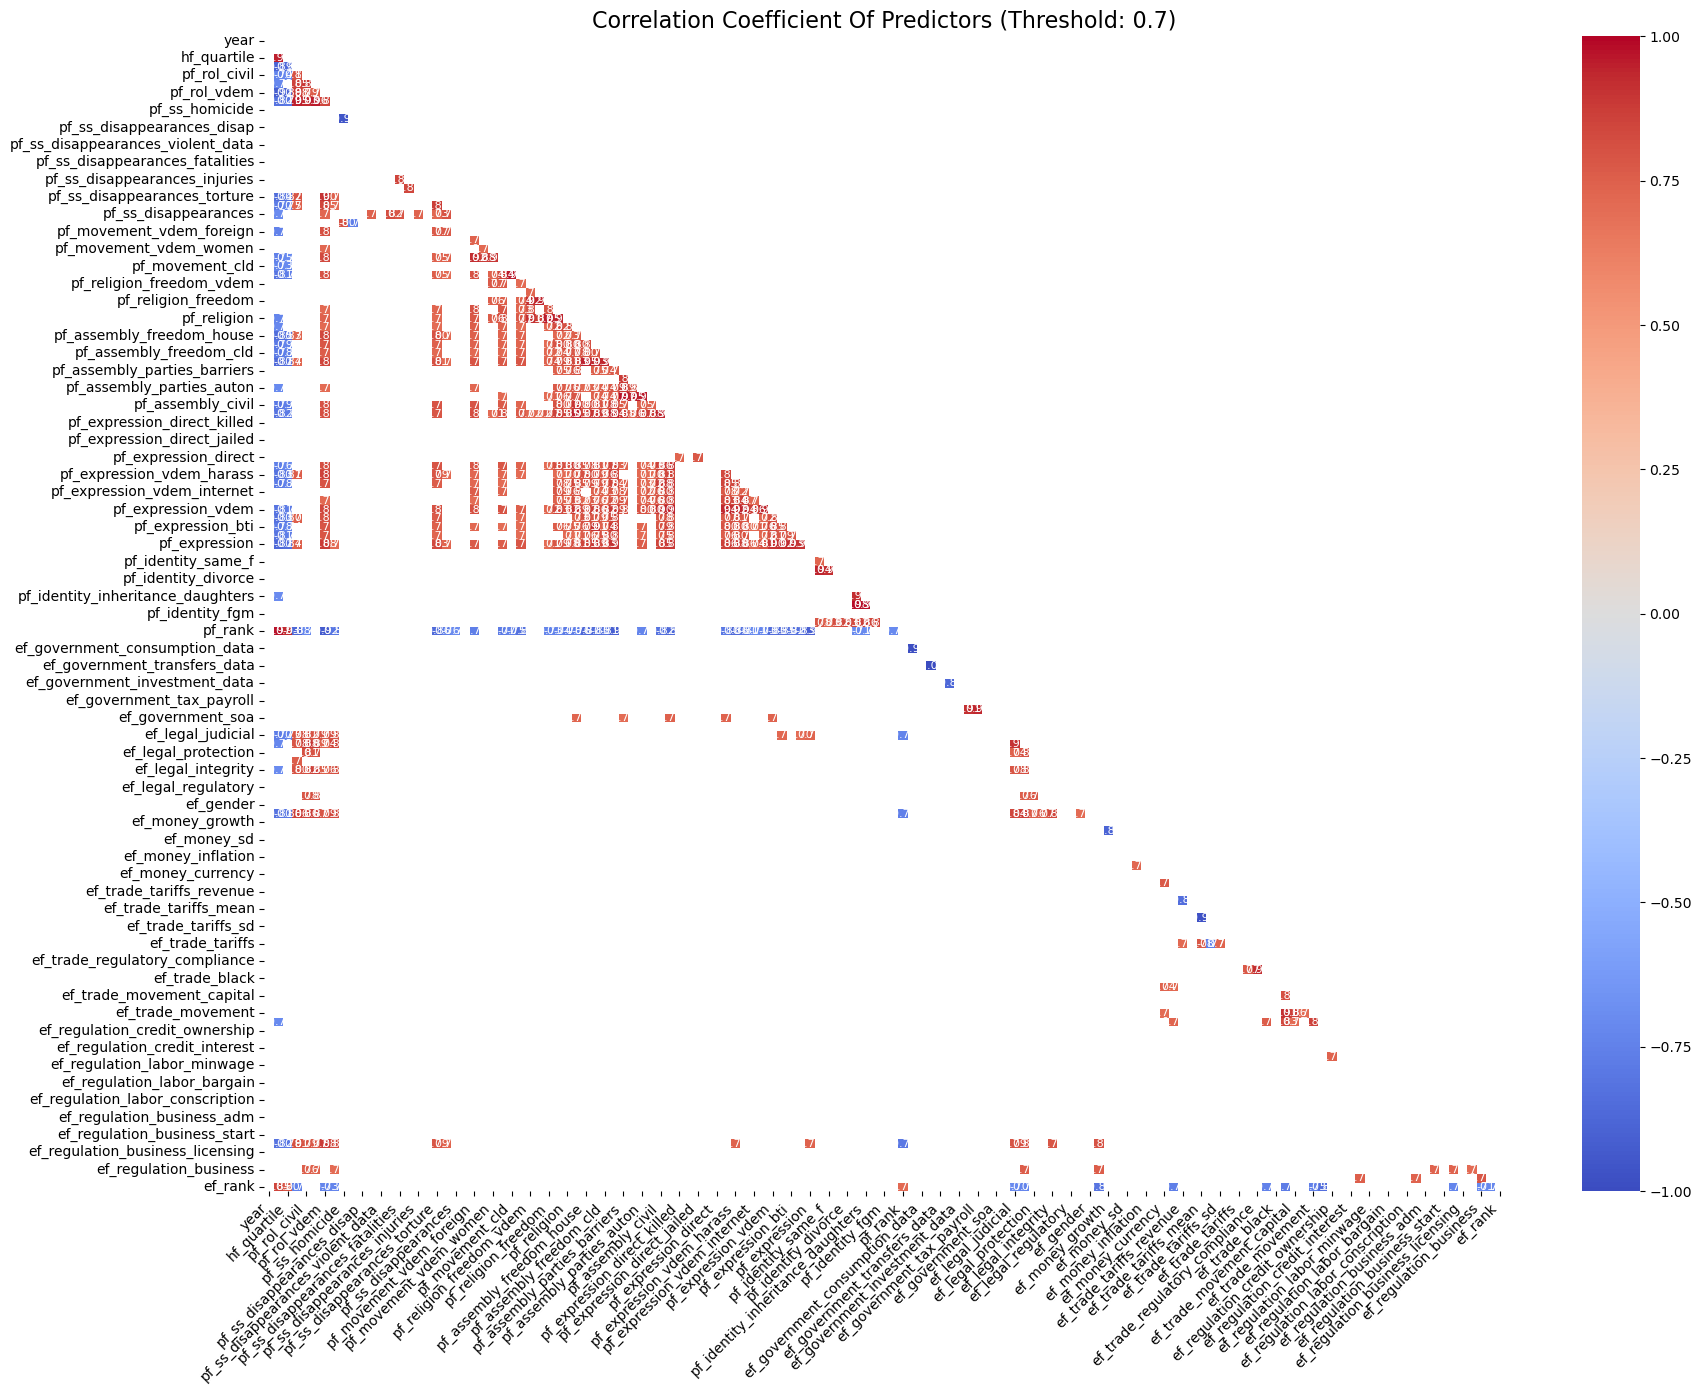

In [162]:
# Heatmap visualizations

# set correlation threshold
corr_threshold = 0.7

# generate correlation matrix
corr_matrix = df_attributes.corr()

# filter to show only highly correlated attributes
high_corr_matrix = corr_matrix[(corr_matrix >= corr_threshold) | (corr_matrix <= -corr_threshold)]

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))

# set figure size
plt.figure(figsize=(20, 15))

# generate heatmap
sns.heatmap(high_corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})

# rotate x-axis tick labels
plt.xticks(rotation=45, fontsize=10, ha='right')  # Adjust horizontal alignment with `ha` parameter
plt.yticks(fontsize=10)

plt.title(f'Correlation Coefficient Of Predictors (Threshold: {corr_threshold})', fontsize=16)
plt.show()


In [163]:
# Get correlation matrix
corr_matrix = df_attributes.corr()

# Extract features with high correlations
high_correlation_features = set()
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[col, row]) > 0.85:
            high_correlation_features.add(col)
            high_correlation_features.add(row)

# Convert the set to a list
high_correlation_features = list(high_correlation_features)

# Print the list of features
print("Features with high correlations:")
for feature in high_correlation_features:
    print(feature)

Features with high correlations:
ef_money_growth_data
pf_expression_vdem
ef_government_consumption_data
pf_movement
pf_assembly_entry
pf_religion_freedom_cld
pf_identity_same_f
pf_expression_cld
ef_money_growth
pf_identity_inheritance_widows
hf_quartile
pf_religion_suppression
pf_rol_vdem
ef_government_tax_payroll
pf_expression_vdem_harass
ef_trade_tariffs_mean_data
pf_rol_civil
ef_trade_movement_capital
pf_movement_vdem_foreign
pf_assembly_freedom
pf_assembly_parties
pf_identity_same
pf_expression_bti
ef_legal_judicial
pf_rol_criminal
pf_expression_house
pf_movement_cld
pf_movement_vdem_men
pf_religion
pf_expression_vdem_gov
pf_expression_vdem_internet
ef_trade_tariffs_mean
pf_rank
ef_trade_regulatory
pf_expression_vdem_cultural
pf_identity_inheritance
pf_assembly
pf_assembly_parties_barriers
pf_ss_homicide_data
ef_trade_regulatory_compliance
pf_movement_vdem_women
ef_government_investment
ef_legal_integrity
pf_rol_procedural
ef_trade
pf_ss_disappearances_torture
pf_assembly_freedom_b

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def find_high_vif_features(df, considered_features, vif_threshold=10):
    X = df[considered_features].copy()
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)

    # Add a constant for the VIF calculation
    X['intercept'] = 1

    # Calculate VIF values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Add features with infinite VIF values to high_vif_features list
    inf_vif_features = vif[vif['VIF'] == float('inf')]['Variable'].tolist()
    high_vif_features = inf_vif_features.copy()

    # Remove features with infinite VIF values from VIF DataFrame
    if inf_vif_features:
        print(f"Removing features with infinite VIF values: {', '.join(inf_vif_features)}")
        vif = vif[vif['VIF'] != float('inf')]
        considered_features = list(set(considered_features) - set(inf_vif_features))

    # Iteratively remove features with VIF values above the threshold
    while (vif['VIF'] > vif_threshold).any():
        max_vif_feature = vif.loc[vif['VIF'].idxmax()]['Variable']
        high_vif_features.append(max_vif_feature)
        print(f"Removing {max_vif_feature} with VIF = {vif.loc[vif['VIF'].idxmax()]['VIF']}")
        vif = vif[vif['Variable'] != max_vif_feature]
        considered_features.remove(max_vif_feature)

    return high_vif_features

# Set a VIF threshold
vif_threshold = 10

# Features to consider removing
considered_features = high_correlation_features

# Find features with high VIF
high_vif_features = find_high_vif_features(df_attributes, considered_features, vif_threshold)

Removing features with infinite VIF values: pf_expression_vdem, pf_movement, pf_assembly_entry, pf_religion_freedom_cld, pf_identity_same_f, pf_identity_inheritance_widows, pf_religion_suppression, ef_government_tax_payroll, pf_expression_vdem_harass, ef_trade_tariffs_mean_data, pf_rol_civil, pf_movement_vdem_foreign, pf_assembly_freedom, pf_assembly_parties, pf_identity_same, pf_rol_criminal, pf_movement_cld, pf_movement_vdem_men, pf_religion, pf_expression_vdem_gov, pf_expression_vdem_internet, ef_trade_tariffs_mean, pf_expression_vdem_cultural, pf_identity_inheritance, pf_assembly, pf_assembly_parties_barriers, pf_movement_vdem_women, pf_rol_procedural, pf_assembly_freedom_bti, pf_religion_freedom_vdem, pf_assembly_parties_auton, pf_identity_same_m, pf_religion_freedom, pf_assembly_freedom_cld, pf_expression_vdem_selfcens, ef_government_tax_income, ef_government_tax, pf_rol, pf_identity_inheritance_daughters, pf_assembly_civil, pf_movement_vdem, pf_assembly_parties_bans, pf_assembly

In [165]:
high_vif_features

['pf_expression_vdem',
 'pf_movement',
 'pf_assembly_entry',
 'pf_religion_freedom_cld',
 'pf_identity_same_f',
 'pf_identity_inheritance_widows',
 'pf_religion_suppression',
 'ef_government_tax_payroll',
 'pf_expression_vdem_harass',
 'ef_trade_tariffs_mean_data',
 'pf_rol_civil',
 'pf_movement_vdem_foreign',
 'pf_assembly_freedom',
 'pf_assembly_parties',
 'pf_identity_same',
 'pf_rol_criminal',
 'pf_movement_cld',
 'pf_movement_vdem_men',
 'pf_religion',
 'pf_expression_vdem_gov',
 'pf_expression_vdem_internet',
 'ef_trade_tariffs_mean',
 'pf_expression_vdem_cultural',
 'pf_identity_inheritance',
 'pf_assembly',
 'pf_assembly_parties_barriers',
 'pf_movement_vdem_women',
 'pf_rol_procedural',
 'pf_assembly_freedom_bti',
 'pf_religion_freedom_vdem',
 'pf_assembly_parties_auton',
 'pf_identity_same_m',
 'pf_religion_freedom',
 'pf_assembly_freedom_cld',
 'pf_expression_vdem_selfcens',
 'ef_government_tax_income',
 'ef_government_tax',
 'pf_rol',
 'pf_identity_inheritance_daughters',
 

In [166]:
# Remove columns with high VIF from df_attributes
df_attributes.drop(high_vif_features, axis=1, inplace=True)

In [167]:
df_attributes

,year,countries,region,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,...,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_rank
0,2020,Albania,Eastern Europe,10.0,10.000000,0.0,7.5,10.000000,0.0,10.000000,...,6.717929,5.651538,6.000000,9.742477,5.9975,5.621940,7.175250,6.698118,7.112958,26.0
1,2020,Algeria,Middle East & North Africa,10.0,9.687083,25.0,5.0,10.000000,0.0,10.000000,...,5.645397,4.215154,2.222222,9.305002,2.5775,8.771111,7.029528,5.686753,5.778953,157.0
2,2020,Angola,Sub-Saharan Africa,10.0,9.582498,25.0,7.5,9.736578,5.0,9.971733,...,5.338186,2.937894,3.111111,8.730805,4.7025,7.916416,6.782923,5.696942,6.227545,138.0
3,2020,Argentina,Latin America & the Caribbean,5.0,10.000000,0.0,7.5,9.925379,2.0,10.000000,...,5.119549,2.714233,5.555556,9.579288,7.2675,5.726521,6.508295,6.225232,5.490538,161.0
4,2020,Armenia,Caucasus & Central Asia,10.0,10.000000,0.0,7.5,10.000000,0.0,10.000000,...,6.461113,5.170406,5.111111,9.863530,6.2600,9.302574,7.040738,7.124727,7.756333,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,2000,"Venezuela, RB",Latin America & the Caribbean,10.0,10.000000,0.0,NaN,10.000000,0.0,10.000000,...,3.354982,6.417950,6.150000,6.268547,4.3100,NaN,0.315142,4.692328,5.531397,87.0
3461,2000,Vietnam,South Asia,10.0,10.000000,0.0,NaN,10.000000,0.0,10.000000,...,NaN,NaN,NaN,7.885638,3.7000,NaN,0.000000,3.861879,4.416768,105.0
3462,2000,"Yemen, Rep.",Middle East & North Africa,5.0,10.000000,0.0,NaN,8.170079,19.0,7.932996,...,NaN,NaN,NaN,NaN,1.1450,NaN,NaN,NaN,NaN,NaN
3463,2000,Zambia,Sub-Saharan Africa,10.0,10.000000,0.0,NaN,10.000000,0.0,9.827262,...,6.172222,NaN,NaN,8.537578,7.0050,NaN,8.520369,8.020982,6.799421,43.0


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

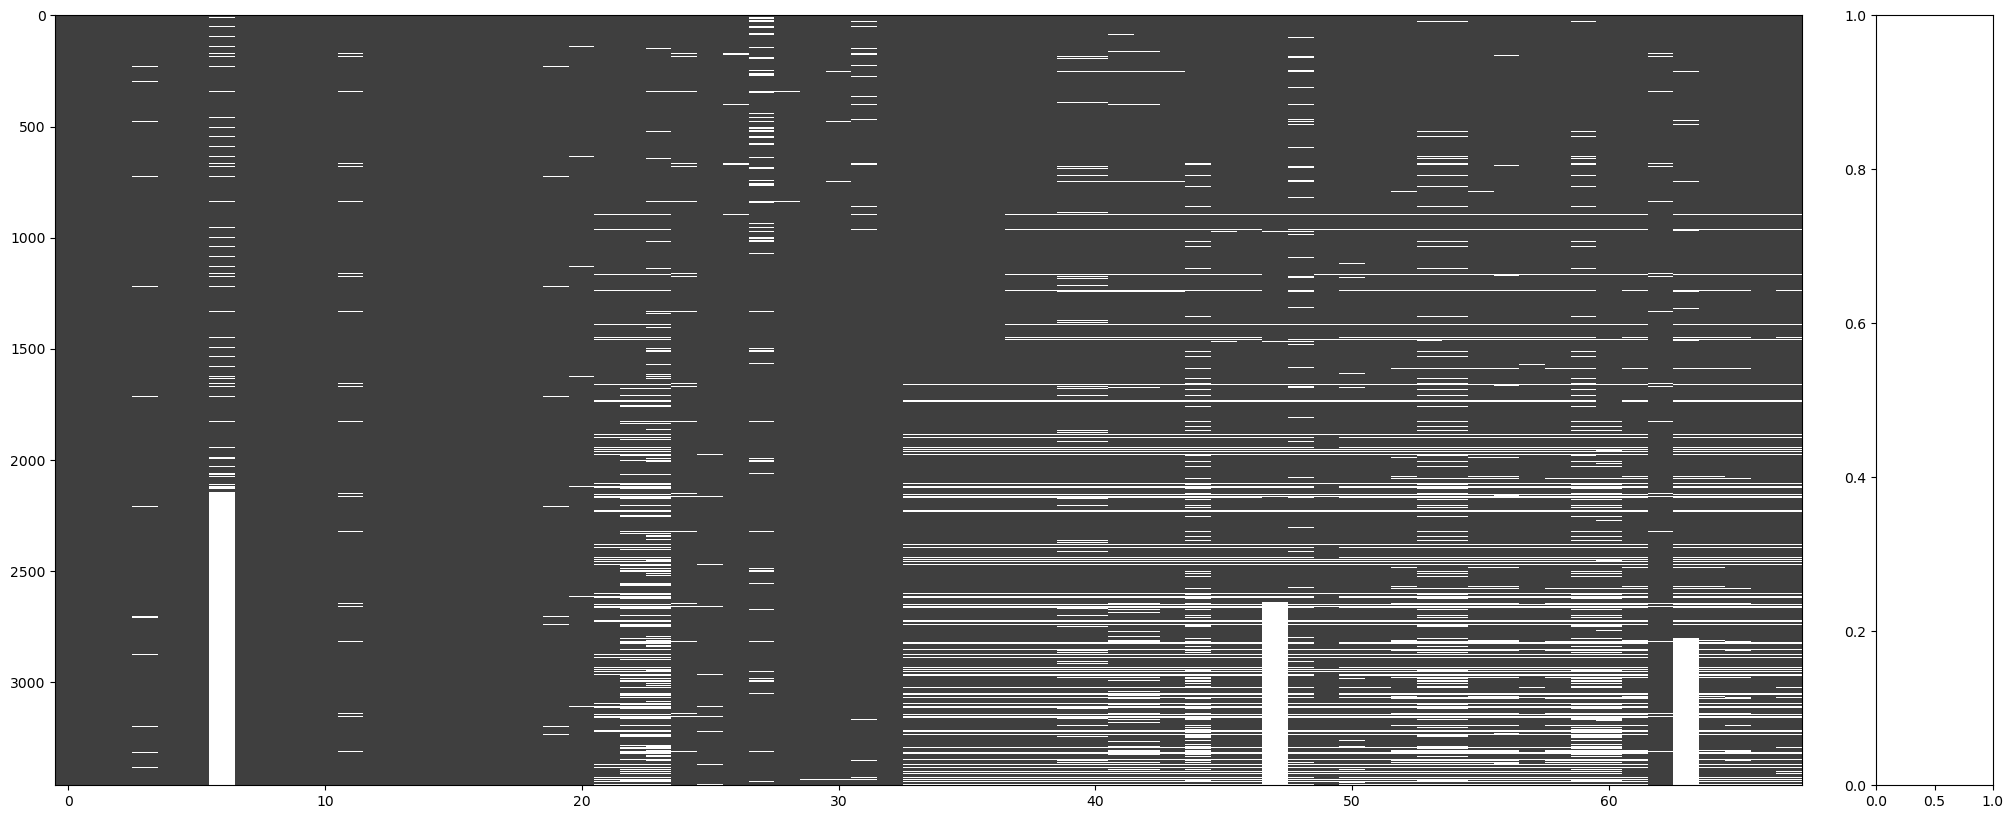

In [175]:
msno.matrix(df_attributes)